**PA 5: Linear Regression**

Polycystic ovary syndrome (PCOS) dataset

Link: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

In [ ]:
import pandas as pd
from google.colab import drive
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing data
file_path_with_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_infertility.csv"
file_path_without_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_data_without_infertility.xlsx"
ModelComp = "/content/drive/MyDrive/project assignments/datasets/Team3_Model_comparison.xlsx"
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")
ModelComparison = pd.read_excel(ModelComp)

In [ ]:
PCOS_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.tail() 

<ipython-input-5-0cd7eedcb9fe>:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9


In [ ]:
data.shape

(541, 44)

In [ ]:
# Identifying the data types
data.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

Two columns are numeric but they are stored as string that we need to convert them to numeric values:

II    beta-HCG(mIU/mL)

AMH(ng/mL)

In [ ]:
# Identifying the missing values
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
# printing rows with missing values
data[data.isna().any(axis=1)]

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,NaN,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,NaN,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,NaN,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,NaN,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
# Dropping rows with NaN value
data = data.dropna()

# Clearing up the extra space in the column names (optional)
data.columns = [col.strip() for col in data.columns]

# Dropping the irrelevent columns
irrelevent=data.iloc[:,0:2]
data=data.drop(irrelevent,axis=1)
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
151,1,29,56.4,150.0,25.1,13,76,22,10.5,4,...,0,1.0,0,110,80,12,14,14.0,18.0,8.0
152,1,31,60.0,156.0,24.7,13,72,18,11.9,4,...,1,1.0,0,110,80,7,5,15.0,16.0,8.5
153,1,29,52.0,147.0,24.1,11,74,18,11.5,4,...,0,0.0,0,110,80,3,5,16.0,19.0,8.0
154,0,26,40.0,152.4,17.2,11,72,20,10.8,2,...,0,0.0,0,120,80,6,5,12.0,14.0,14.0
155,0,26,49.3,158.0,19.7,15,76,18,12.5,4,...,0,0.0,0,120,80,7,7,14.0,16.0,7.5
306,1,41,40.0,155.0,16.6,13,72,16,11.0,2,...,1,0.0,0,110,70,8,12,11.0,11.5,5.5
307,0,24,68.0,158.0,27.2,15,72,16,10.8,2,...,1,1.0,0,120,80,2,4,12.5,12.0,8.0
308,1,33,52.0,152.0,22.5,11,72,18,11.0,2,...,1,1.0,0,110,70,6,9,13.0,13.0,6.0


The columns with missing values (each contain one missing value):

Marraige Status (Yrs)     1

Fast food (Y/N)           1


In [ ]:
# Converting strings to numeric values
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')
# Checking the result
data.dtypes

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

# **Data Analysis & Feature Engineering**

In [ ]:
# Calegorical features
columns = data.columns

categorical_columns_dict = {}
categorical_columns = []
for column in columns:
  if len(data[column].unique()) < 9:
    categorical_columns_dict[column] = len(data[column].unique())
    categorical_columns.append(column)

#print(columns)
for key, value in categorical_columns_dict.items():
  print(key, ": ", value)

PCOS (Y/N) :  2
Age (yrs) :  6
Weight (Kg) :  6
Height(Cm) :  7
BMI :  8
Blood Group :  3
Pulse rate(bpm) :  3
RR (breaths/min) :  4
Hb(g/dl) :  6
Cycle(R/I) :  2
Cycle length(days) :  3
Marraige Status (Yrs) :  6
Pregnant(Y/N) :  2
No. of aborptions :  2
I   beta-HCG(mIU/mL) :  3
II    beta-HCG(mIU/mL) :  3
FSH(mIU/mL) :  8
LH(mIU/mL) :  8
FSH/LH :  8
Hip(inch) :  7
Waist(inch) :  3
Waist:Hip Ratio :  7
TSH (mIU/L) :  8
AMH(ng/mL) :  8
PRL(ng/mL) :  8
Vit D3 (ng/mL) :  8
PRG(ng/mL) :  4
RBS(mg/dl) :  7
Weight gain(Y/N) :  2
hair growth(Y/N) :  2
Skin darkening (Y/N) :  2
Hair loss(Y/N) :  2
Pimples(Y/N) :  2
Fast food (Y/N) :  2
Reg.Exercise(Y/N) :  1
BP _Systolic (mmHg) :  2
BP _Diastolic (mmHg) :  2
Follicle No. (L) :  6
Follicle No. (R) :  6
Avg. F size (L) (mm) :  7
Avg. F size (R) (mm) :  7
Endometrium (mm) :  6


From the table above and analyzing the data we can colclude the following columns are categorical:

Blood Group

Cycle(R/I)

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N) 

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
# Removing the incorrect ones from the categorical columns
categorical_columns.remove('RR (breaths/min)')
categorical_columns.remove('No. of aborptions')
categorical_columns.remove('BP _Systolic (mmHg)')
categorical_columns.remove('BP _Diastolic (mmHg)')
categorical_columns.remove('PCOS (Y/N)')

In [ ]:
# The rest are numerical columns
numeric_columns = list(set(columns) - set(categorical_columns))
numeric_columns

['RR (breaths/min)',
 'No. of aborptions',
 'PCOS (Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)']

The label of the model we are going to choose would be:

PCOS (Y/N)

We have deleted the row 157 and row 459 with missing values.

We have also deleted the first two columns that is irrelevent with the future ML model we are going to build.

After all these, we couldn't identify any more issues with the data. So we will proceed with the univariate and bivariate analysis.

**Univariate analysis & bivariate analysis**

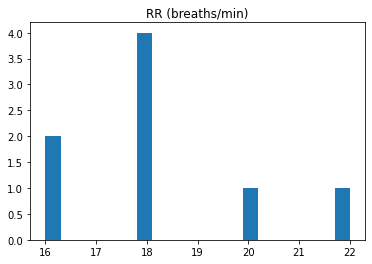

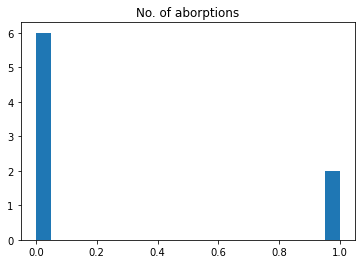

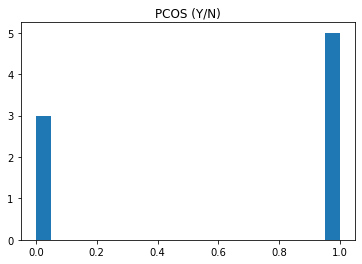

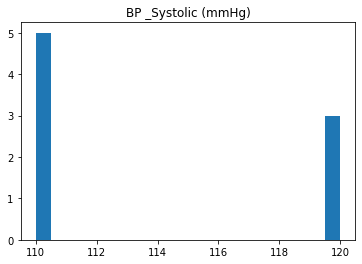

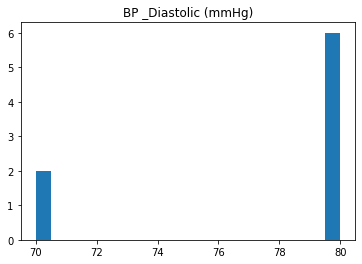

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have a Gaussian distribution:

Endometrium

Weight

Age

Mariage Status

PRL

Cycle Length

Waist

Hip

Waist:Hip ratio

Average F Size

RBS

BMI

Height

HB

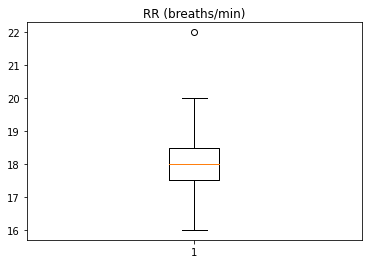

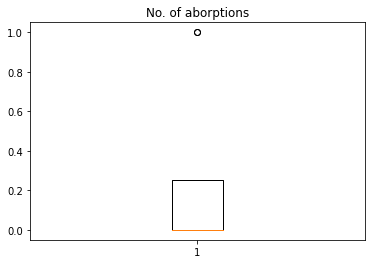

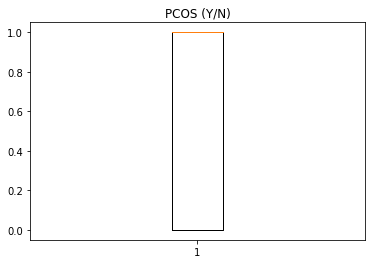

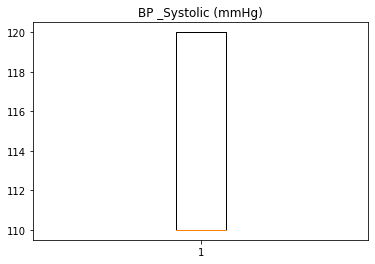

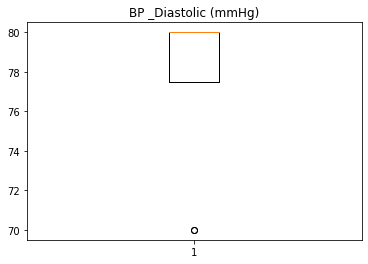

In [ ]:
for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(data[col])

<ipython-input-17-59c9f45bfb1c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


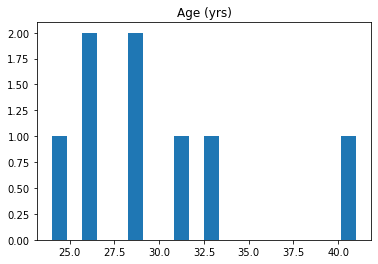

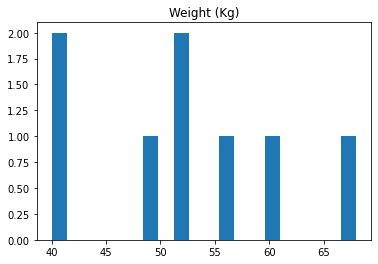

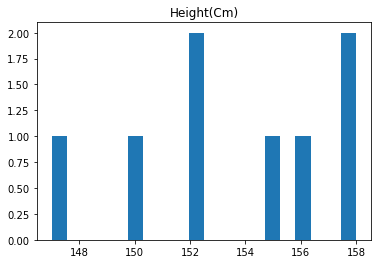

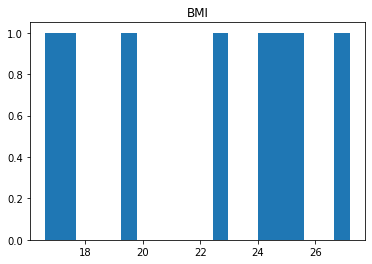

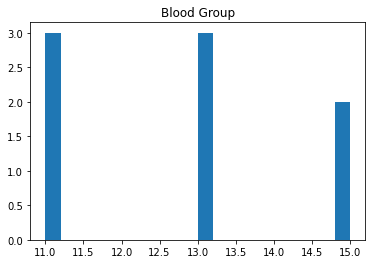

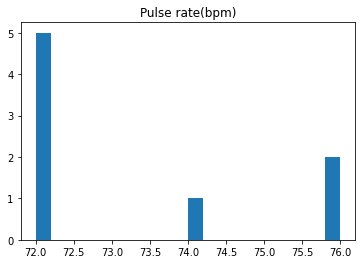

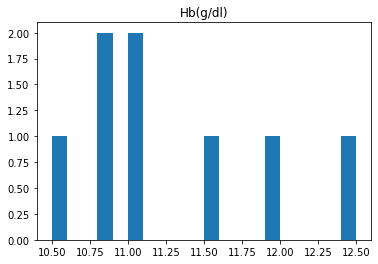

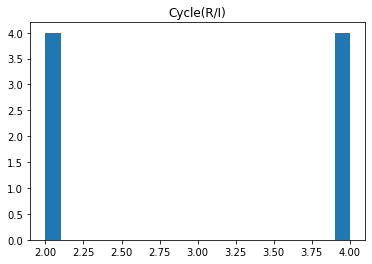

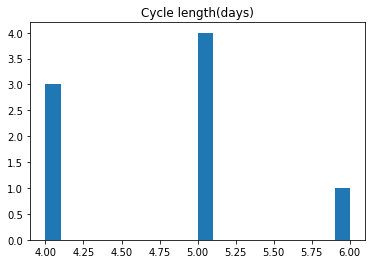

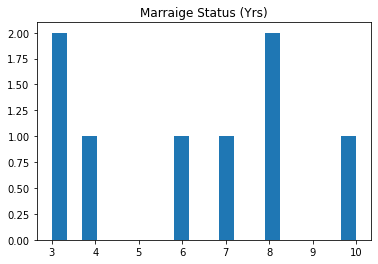

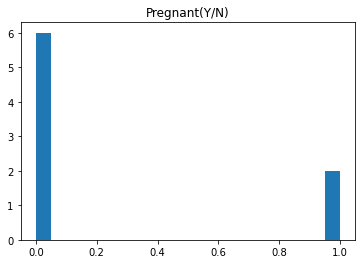

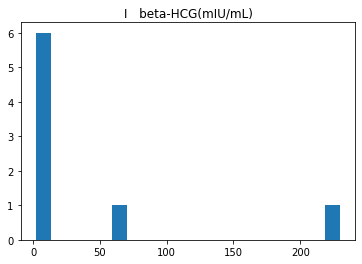

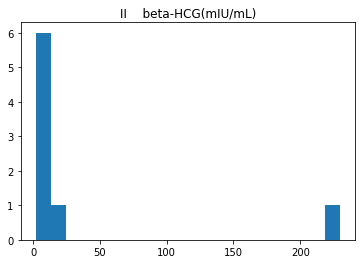

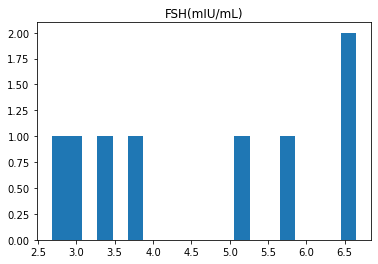

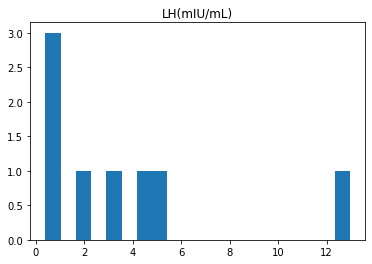

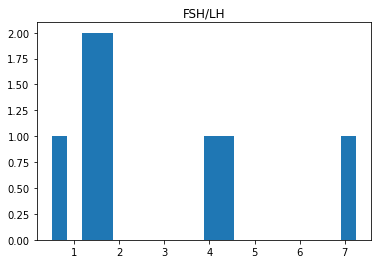

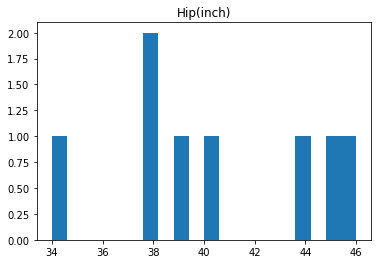

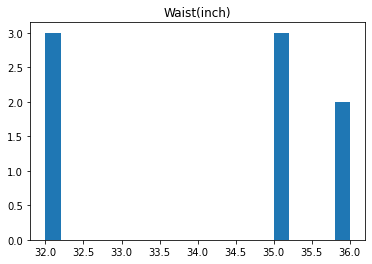

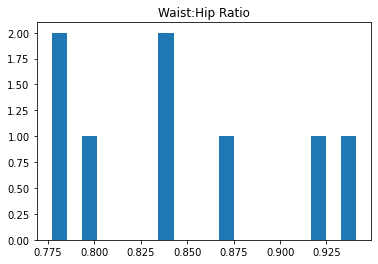

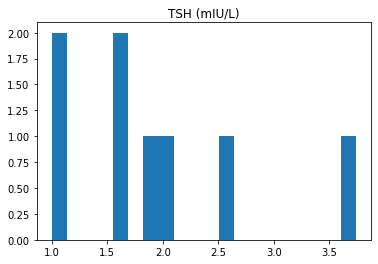

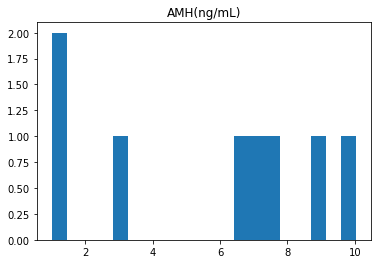

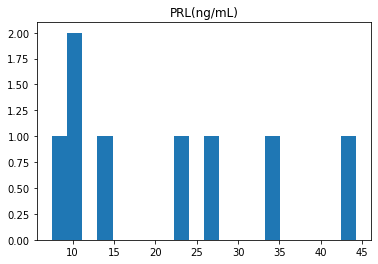

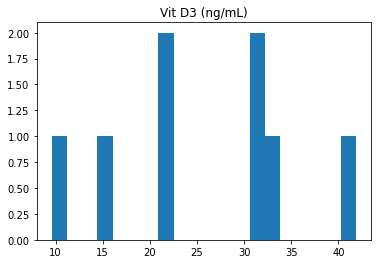

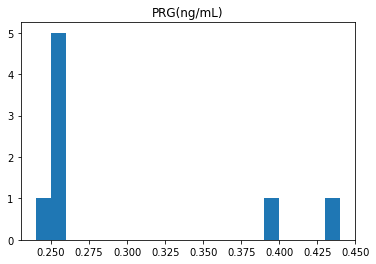

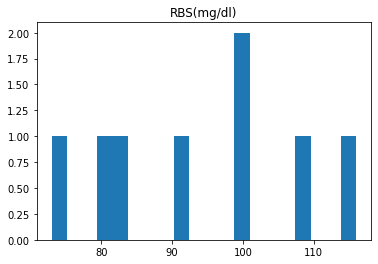

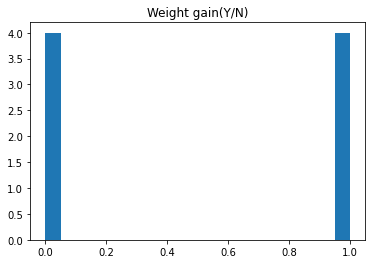

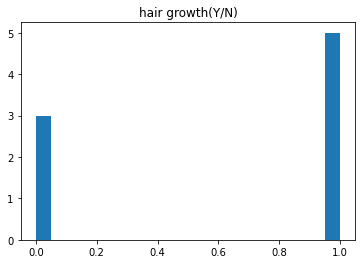

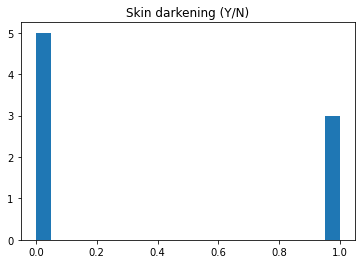

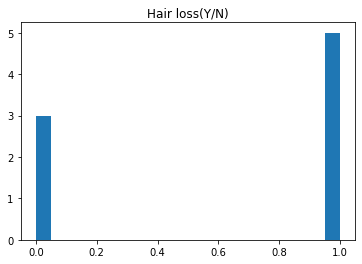

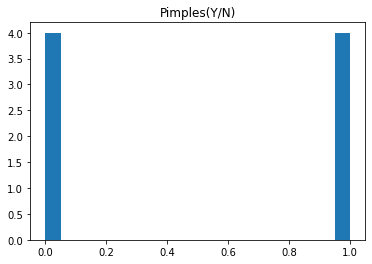

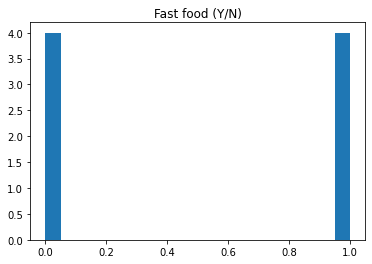

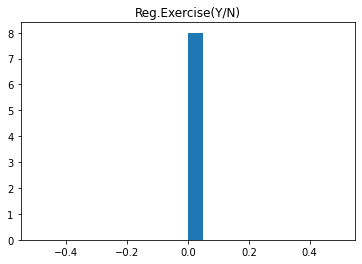

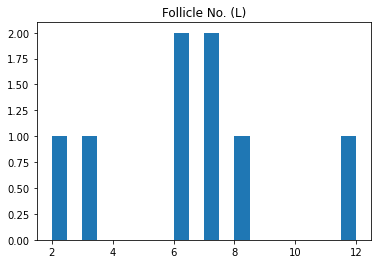

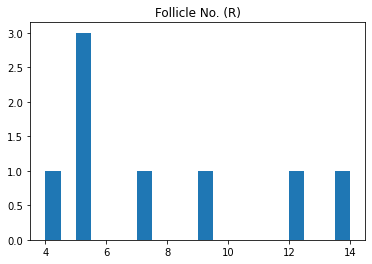

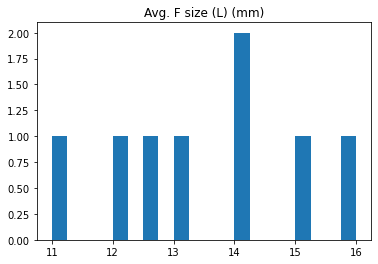

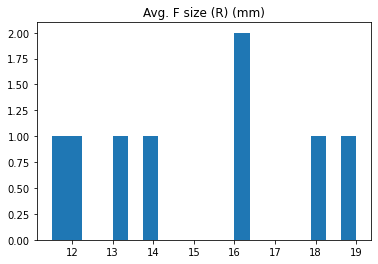

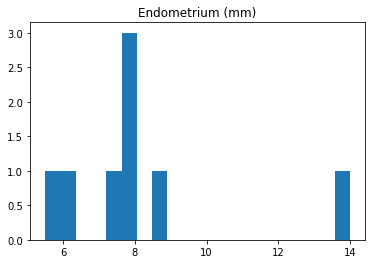

In [ ]:
for col in categorical_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have outliers:

PRG

FSH

LH

FSH/LH

AMH

PRL

Cycle(R/I)

I   beta-HCG

II    beta-HCG

Pulse rate

TSH

Vit D3
 
RBS

BP _Systolic

BP _Diastolic.

In "Cycle (R/I)": there is an outlier value of 5, possibly a typo during the data recording. Should we drop this sample?

In "Pulse rate": one count of 13, one count of 18. Are they typos?

"beta HCG", "PRL", "TSH", "FSH" "LH" "AMH" "PRL" "Vit D3" "PRG" and "RBS" columns have a lot of outliers which rises some concerns with respect to the correctness of lab measurements.

BP_systolic: a value of 12. Maybe a typo during the data recording. Should it be 120 instead?

BP_Diastolic: a value of 8. Maybe a typo during the data recording. Should it be 80 instead?


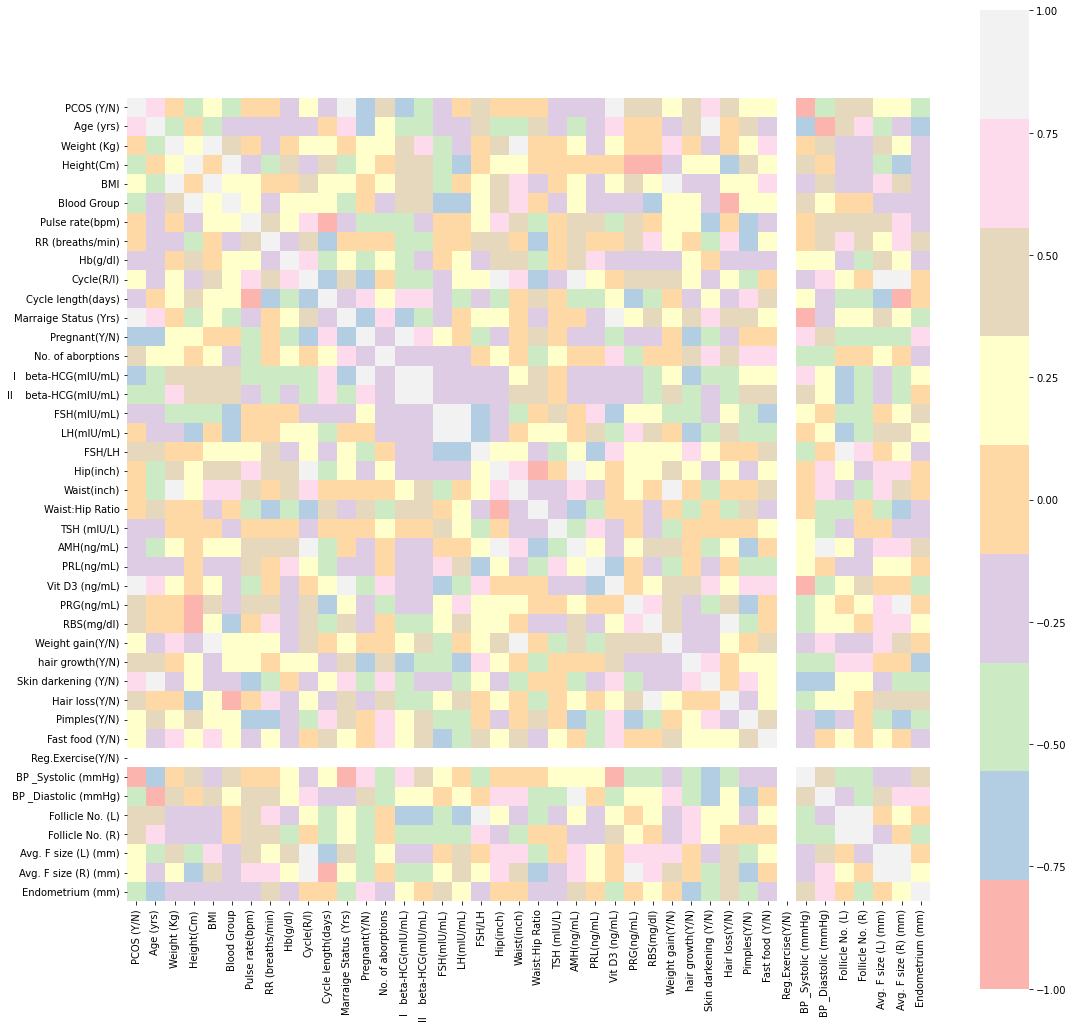

In [ ]:
import seaborn as sns

# Examaning a correlation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

Features with binary values:

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N)

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)


PCOS (Y/N)                1.000000
Marraige Status (Yrs)     0.893333
Vit D3 (ng/mL)            0.788942
Age (yrs)                 0.702058
Skin darkening (Y/N)      0.600000
RBS(mg/dl)                0.533244
Follicle No. (R)          0.512766
Hair loss(Y/N)            0.466667
hair growth(Y/N)          0.466667
FSH/LH                    0.452504
No. of aborptions         0.447214
PRG(ng/mL)                0.422616
Follicle No. (L)          0.371162
Avg. F size (L) (mm)      0.305942
Avg. F size (R) (mm)      0.281553
Fast food (Y/N)           0.258199
Pimples(Y/N)              0.258199
Cycle(R/I)                0.258199
Weight gain(Y/N)          0.258199
BMI                       0.164079
RR (breaths/min)          0.104447
LH(mIU/mL)                0.053360
Waist:Hip Ratio          -0.002764
Weight (Kg)              -0.019211
Hip(inch)                -0.033333
Pulse rate(bpm)          -0.037662
Waist(inch)              -0.095433
TSH (mIU/L)              -0.114589
Hb(g/dl)            

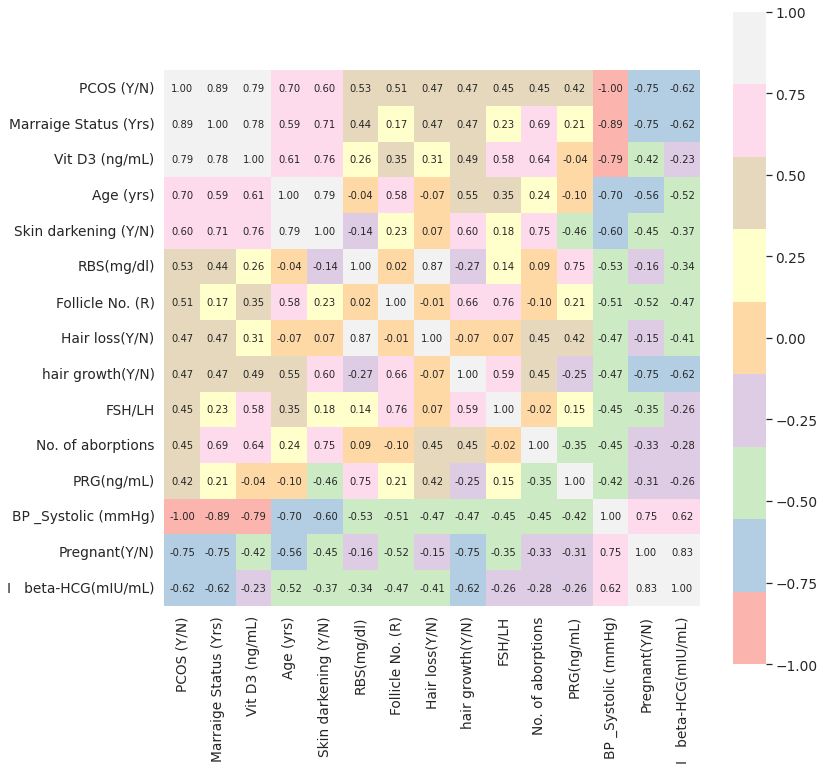

In [ ]:
import numpy as np

#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since the ranges of features vary a lot between our features we will need to perform scaling before building the ML model.

Here are some potential datasets that could be added to the PCOS dataset to improve its usefulness and scope:

Diet and lifestyle habits: Information about the patient's diet and exercise habits can provide insight into the potential causes of PCOS and help guide treatment recommendations.

Genomic data: Genomic data can provide insight into the genetic basis of PCOS and help identify potential risk factors and treatment targets.

No change in problem definition is needed.

**Check extreme values:**

Vit D3 : 2 extreme values that are > 5000 ng/ml. Drop these two samples.

PRG: 1 extreme value that is > 80 ng/ml. Drop this sample.

FSH: 1 extreme value is > 5000 mIU/ml. Drop this sample.

LH: 1 extreme value is > 2000 mIU/ml. Drop this sample.

FSH/LH: 2 exteme value, above 200. Drop these two samples.

AMH: 1 extreme value that is > 60 ng/ml. Drop this sample.

PRL: 2 extreme values that are > 100 ng/ml. Drop these two samples.

Cycle(R/I): 1 extreme value, value of 5. Maybe a typo? Drop this sample.

Pulse rate: 2 extreme value are < 20 bpm. Drop these two samples.

TSH: 1 extreme value is > 50 mIU/L. Drop this sample.
 
RBS: 2 extreme value are >200 mg/dl. Drop these two samples.

BP_Systolic: 1 extreme value, value=12. Drop this sample.

BP_Diastolic: 1 extreme value, value=8. Drop this sample.

In [ ]:
percentage = 18 / 539
print(percentage)

0.03339517625231911


Assume all the extreme values belong to different rows, the maximum percentage of extreme values for the dataset is less than 5% of the total sample size. We decided to drop all the extreme values.

In [ ]:
# Drop the missing values ??
data.dropna(inplace = True)
data.isnull().values.any()

False

Pick three features that have higher positive correlation with respect to the label to build k-NN model.

In [ ]:
# data = data[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)', 'Skin darkening (Y/N)', 'Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
# Modify Here!
data_3feature = data [["PCOS (Y/N)",'Follicle No. (R)','Follicle No. (L)', 'Cycle length(days)']]
data_3feature

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Cycle length(days)
151,1,14,12,4
152,1,5,7,5
153,1,5,3,4
154,0,5,6,5
155,0,7,7,4
306,1,12,8,5
307,0,4,2,6
308,1,9,6,5


In [ ]:
# Let's check whether our data is balanced enough 
data_3feature['PCOS (Y/N)'].value_counts()

1    5
0    3
Name: PCOS (Y/N), dtype: int64

Our dataset is rather significant imbalance between two groups. To get the best results, we need to make sure that there are almost 50% instances of both 0.0 and 1.0. In this case, we will perform random Oversampling.

In [ ]:
X = data_3feature.drop(["PCOS (Y/N)"], axis = 1)# droping out target from features
y = data_3feature["PCOS (Y/N)"]

!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.9)
X, y = oversample.fit_resample(X, y)
y.value_counts()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1    5
0    4
Name: PCOS (Y/N), dtype: int64

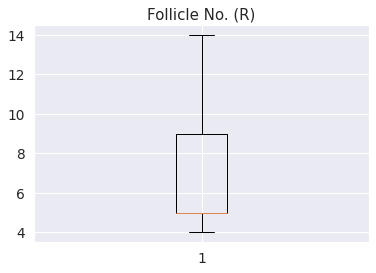

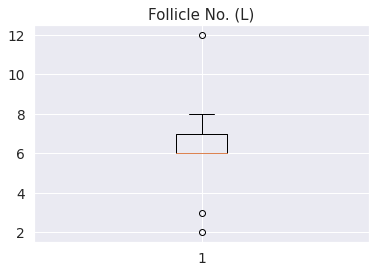

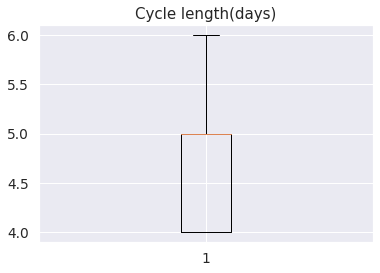

In [ ]:
for col in X.columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(X[col])

Let's do min max scale for the dataset with these selected features:

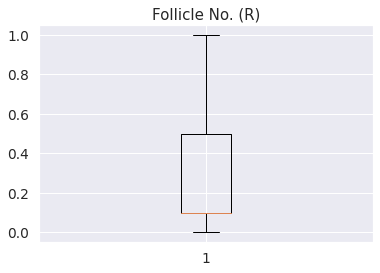

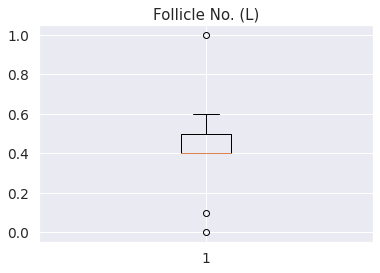

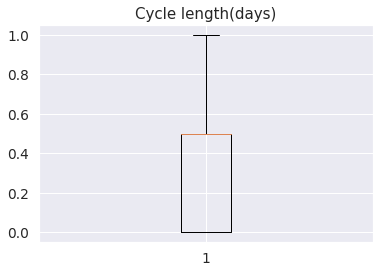

In [ ]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
cols = X.columns
x_scaled = sscaler.fit_transform(X)
X_Scaled = pd.DataFrame(x_scaled, columns= cols)
X_Scaled
# Boxplots for the min-max scaled dataset.
for col in X_Scaled.columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(X_Scaled[col])


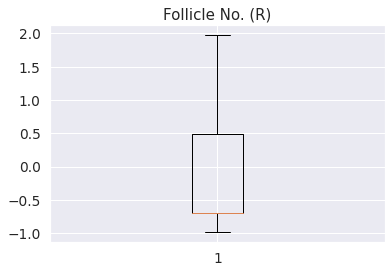

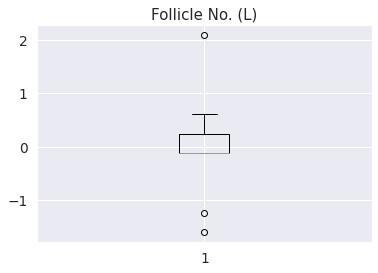

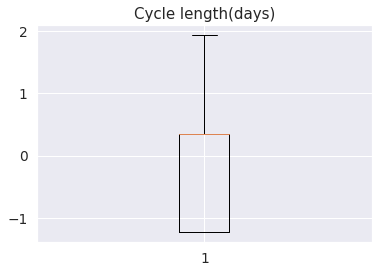

In [ ]:
# Standardize Scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cols = X.columns
x_stand_scaled = standard_scaler.fit_transform(X)
X_stand_Scaled = pd.DataFrame(x_stand_scaled, columns= cols)
X_stand_Scaled
# Boxplots for the standardizing scaled dataset.
for col in X_stand_Scaled.columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(X_stand_Scaled[col])

In [ ]:
# Splitting the original data into test and training sets.
X_values = X.to_numpy()
X2_values = X_values[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X2_values, y, test_size=0.33, random_state=42)

In [ ]:
# Splitting the min max scaled data into test and training sets.
X_Scaled_values = X_Scaled.to_numpy()
X2_Scaled_values = X_Scaled_values[:, :2]
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X2_Scaled_values, y, test_size=0.33, random_state=42)

In [ ]:
# Splitting the standardizing scaled data into test and training sets.
X_stand_Scaled_values = X_stand_Scaled.to_numpy()
X2_stand_Scaled_values = X_stand_Scaled_values[:, :2]
X_train_stand, X_test_stand, y_train, y_test = train_test_split(X2_stand_Scaled_values, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import linear_model
from sklearn import linear_model

regr = linear_model.LinearRegression().fit(X_train, y_train)
yhat_test_r = regr.predict(X_test)
print(regr.coef_)



[ 0.24522901 -0.1889313 ]


In [ ]:
LRRidge = linear_model.Ridge().fit(X_train, y_train) #defaut alpha value = 1.0
yhat_test_ridge = LRRidge.predict(X_test)
print(LRRidge.coef_)

[ 0.21299639 -0.15523466]


In [ ]:
LRRidge = linear_model.Ridge(alpha=0.2).fit(X_train, y_train) #defaut alpha value = 0.2
yhat_test_ridge = LRRidge.predict(X_test)
print(LRRidge.coef_)

[ 0.23789381 -0.18124805]


With the model Ridge, when we tweak the value of alpha, it did not change the coefficients.

In [ ]:
LRLasso = linear_model.Lasso(alpha=1.0).fit(X_train, y_train) #default alpha value = 1.0
yhat_test_Lasso = LRLasso.predict(X_test)
print(LRLasso.coef_)


[0. 0.]


In [ ]:
LRLasso = linear_model.Lasso(alpha=0.2).fit(X_train, y_train)
yhat_test_Lasso = LRLasso.predict(X_test)
print(LRLasso.coef_)


[ 0.06442308 -0.        ]


However, with the model Lasso, if we change the value of alpha in the model, we will get different coefficients from the model.

**Evaluating the Algorithm**

1. LinearRegression model:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat_test_r))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,yhat_test_r))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, yhat_test_r)))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test,yhat_test_r))

Mean Absolute Error: 0.540712468193384
Mean Squared Error: 0.5589229697181592
Root Mean Squared Error: 0.7476115098887652
Coefficient of determination: 0.00


2. Ridge model:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat_test_ridge))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,yhat_test_ridge))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, yhat_test_ridge)))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test,yhat_test_ridge))

Mean Absolute Error: 0.5318632409467936
Mean Squared Error: 0.5394676053038914
Root Mean Squared Error: 0.7344845847966391
Coefficient of determination: 0.00


3. Lasso model:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat_test_Lasso))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,yhat_test_Lasso))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, yhat_test_Lasso)))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test,yhat_test_Lasso))

Mean Absolute Error: 0.5378205128205129
Mean Squared Error: 0.3233758629191322
Root Mean Squared Error: 0.5686614660051551
Coefficient of determination: 0.00


Let's check the performance of Random Forest Classifier:

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) #creates a Random forest model
rfc.fit(X_train, y_train) #trains model on data
yhat_rfc = rfc.predict(X_test) #prediction
accuracy = accuracy_score(y_test, yhat_rfc)
print(accuracy)

0.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat_rfc))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,yhat_rfc))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, yhat_rfc)))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test,yhat_rfc))

Mean Absolute Error: 1.0
Mean Squared Error: 1.0
Root Mean Squared Error: 1.0
Coefficient of determination: 0.00




**ML Model Comparison**

|Algorithm | MAE | MSE| RMSE|R2 Score

|LinearRegression|





In [ ]:
classi_report = classification_report(y_test, yhat_rfc)
print(classi_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Let's try XGBoost as the classification model

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5 )
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)


0.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

ModelComparison


,Algorithm,MAE,MSE,RMSE,R2 Score
0,LinearRegression,0.3032,0.1427,0.3778,0.42
1,Ridge,0.3032,0.1427,0.2777,0.42
2,Lasso,0.3177,0.1430,0.3781,0.42
